# Mesh

In [1]:
import k3d
import matplotlib.pyplot as plt

import discretisedfield as df

p1 = (-10e-9, -5e-9, -2e-9)
p2 = (10e-9, 5e-9, 2e-9)
cell = (1e-9, 1e-9, 1e-9)

region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region, cell=cell)

In [2]:
mesh = df.Mesh(region, n=(20, 10, 4))

In [3]:
mesh = df.Mesh(
    region,
    n=(20, 10, 4),
    subregions={
        "r1": df.Region(p1=p1, p2=(0, 5e-9, 2e-9)),
        "r2": df.Region(p1=(0, -5e-9, -2e-9), p2=p2),
    },
)

In [4]:
mesh.cell

(1e-09, 1e-09, 1e-09)

In [5]:
mesh.n

(20, 10, 4)

In [6]:
len(mesh)

800

In [7]:
mesh.indices

<generator object Mesh.indices at 0x7fda59e11e40>

In [8]:
list(mesh)

[(-9.5e-09, -4.5e-09, -1.5000000000000002e-09),
 (-8.5e-09, -4.5e-09, -1.5000000000000002e-09),
 (-7.500000000000001e-09, -4.5e-09, -1.5000000000000002e-09),
 (-6.5e-09, -4.5e-09, -1.5000000000000002e-09),
 (-5.5e-09, -4.5e-09, -1.5000000000000002e-09),
 (-4.5e-09, -4.5e-09, -1.5000000000000002e-09),
 (-3.5e-09, -4.5e-09, -1.5000000000000002e-09),
 (-2.4999999999999992e-09, -4.5e-09, -1.5000000000000002e-09),
 (-1.5000000000000002e-09, -4.5e-09, -1.5000000000000002e-09),
 (-4.999999999999995e-10, -4.5e-09, -1.5000000000000002e-09),
 (5.000000000000012e-10, -4.5e-09, -1.5000000000000002e-09),
 (1.5000000000000002e-09, -4.5e-09, -1.5000000000000002e-09),
 (2.500000000000001e-09, -4.5e-09, -1.5000000000000002e-09),
 (3.5e-09, -4.5e-09, -1.5000000000000002e-09),
 (4.500000000000001e-09, -4.5e-09, -1.5000000000000002e-09),
 (5.5e-09, -4.5e-09, -1.5000000000000002e-09),
 (6.500000000000002e-09, -4.5e-09, -1.5000000000000002e-09),
 (7.500000000000001e-09, -4.5e-09, -1.5000000000000002e-09),
 

In [9]:
mesh == 5

False

In [10]:
mesh != 5

True

In [11]:
mesh == mesh

True

In [12]:
repr(mesh)

"Mesh(region=Region(p1=(-1e-08, -5e-09, -2e-09), p2=(1e-08, 5e-09, 2e-09)), n=(20, 10, 4), bc='', subregions={'r1': Region(p1=(-1e-08, -5e-09, -2e-09), p2=(0.0, 5e-09, 2e-09)), 'r2': Region(p1=(0.0, -5e-09, -2e-09), p2=(1e-08, 5e-09, 2e-09))})"

In [13]:
mesh.index2point((0, 0, 0))

(-9.5e-09, -4.5e-09, -1.5000000000000002e-09)

In [14]:
mesh.point2index((0, 0, 0))

(10, 4, 2)

In [15]:
mesh.neighbours((0, 0, 0))

[(1, 0, 0), (0, 1, 0), (0, 0, 1)]

In [16]:
mesh.neighbours((3, 3, 2))

[(2, 3, 2), (4, 3, 2), (3, 2, 2), (3, 4, 2), (3, 3, 1), (3, 3, 3)]

In [17]:
mesh.line(p1=p1, p2=p2, n=5)

<generator object Mesh.line at 0x7fda59e44350>

In [18]:
mesh.plane("z")

Mesh(region=Region(p1=(-1e-08, -5e-09, -5e-10), p2=(1e-08, 5e-09, 5e-10)), n=(20, 10, 1), bc='', subregions={})

In [19]:
mesh["r1"]

Mesh(region=Region(p1=(-1e-08, -5e-09, -2e-09), p2=(0.0, 5e-09, 2e-09)), n=(10, 10, 4), bc='', subregions={})

In [20]:
mesh["r2"]

Mesh(region=Region(p1=(0.0, -5e-09, -2e-09), p2=(1e-08, 5e-09, 2e-09)), n=(10, 10, 4), bc='', subregions={})

In [21]:
mesh.pad(pad_width={"x": (1, 1)}).n

(22, 10, 4)

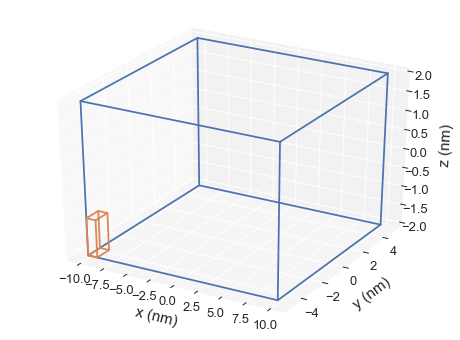

In [22]:
mesh.mpl()

Text(0.5, 0, 'A')

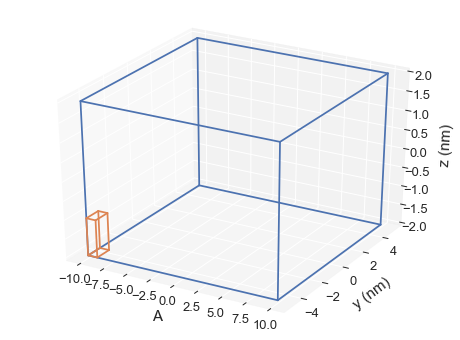

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
mesh.mpl(ax=ax)
ax.set_xlabel("A")

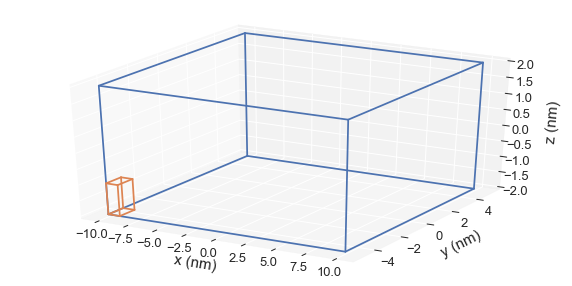

In [24]:
mesh.mpl(figsize=(10, 5))

In [25]:
mesh.mpl(figsize=(10, 5), color=("#dd8452", "#ff00ff"))

In [26]:
mesh.mpl(figsize=(10, 5), color=("#dd8452", "#ff00ff"), multiplier=1e-6)

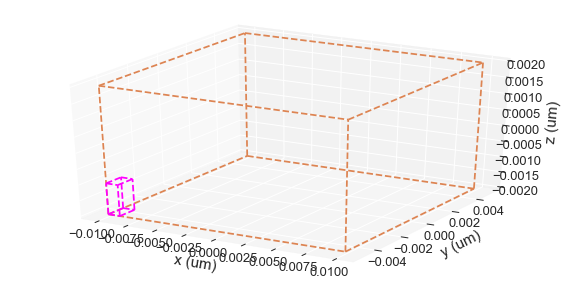

In [27]:
mesh.mpl(
    figsize=(10, 5), color=("#dd8452", "#ff00ff"), multiplier=1e-6, linestyle="dashed"
)

In [28]:
mesh.mpl(
    figsize=(10, 5),
    color=("#dd8452", "#ff00ff"),
    multiplier=1e-9,
    linestyle="dashed",
    filename="mesh.pdf",
)

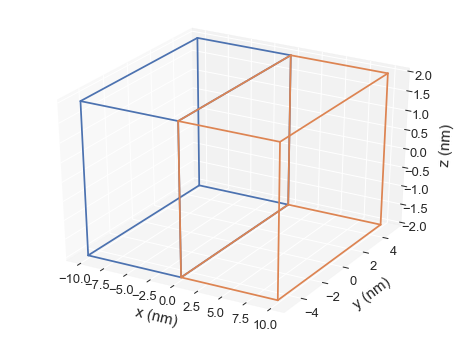

In [29]:
mesh.mpl_subregions()

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
mesh.mpl_subregions(ax=ax)
ax.set_xlabel("A")

Text(0.5, 0, 'A')

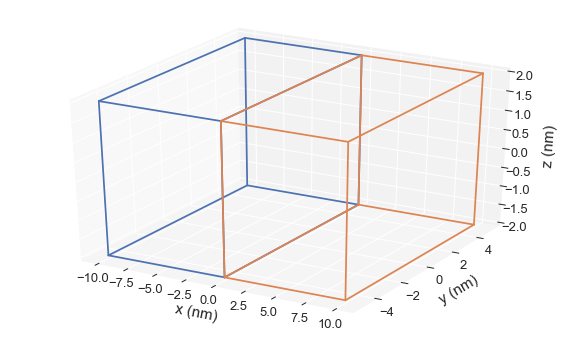

In [31]:
mesh.mpl_subregions(figsize=(10, 6))

In [32]:
mesh.mpl_subregions(figsize=(10, 6), color=("#ff00ff", "#00ffff"))

In [33]:
mesh.mpl_subregions(figsize=(10, 6), color=("#ff00ff", "#00ffff"), multiplier=1e-6)

In [34]:
mesh.mpl_subregions(
    figsize=(10, 6), color=("#ff00ff", "#00ffff"), multiplier=1e-6, marker="o"
)

In [35]:
mesh.mpl_subregions(
    figsize=(10, 6),
    color=("#ff00ff", "#00ffff"),
    multiplier=1e-9,
    marker="o",
    filename="subregions.pdf",
)

In [36]:
mesh.k3d()

Output()

In [37]:
plot = k3d.plot()
mesh.k3d(plot=plot)
plot.display()

Output()

In [38]:
plot.axes = ["A", "B", "C"]

In [39]:
mesh.k3d(color=(12345, 54321))

Output()

In [40]:
mesh.k3d(color=(12345, 54321), multiplier=1e-6)

Output()

In [41]:
mesh.k3d(color=(12345, 54321), multiplier=1e-6, wireframe=True)

Output()

In [42]:
mesh.k3d_subregions()

Output()

In [43]:
plot = k3d.plot()
mesh.k3d_subregions(plot=plot)
plot.display()
plot.axes = ["A", "B", "C"]

Output()

In [44]:
mesh.k3d_subregions(color=(32145, 98543))

Output()

In [45]:
mesh.k3d_subregions(color=(32145, 98543), multiplier=1e-12)

Output()

In [46]:
mesh.k3d_subregions(color=(32145, 98543), multiplier=1e-12, wireframe=True)

Output()

In [47]:
mesh.slider("x")

SelectionSlider(description='x (nm)', index=10, options=((-9.5, -9.5e-09), (-8.5, -8.5e-09), (-7.5, -7.5e-09),…

In [48]:
mesh.slider("y")

SelectionSlider(description='y (nm)', index=5, options=((-4.5, -4.5e-09), (-3.5, -3.5e-09), (-2.5, -2.5e-09), …

In [53]:
mesh.slider("z", description="A")

SelectionSlider(description='A', index=2, options=((-1.5, -1.5000000000000002e-09), (-0.5, -5.000000000000001e…

In [50]:
mesh.axis_selector()

Dropdown(description='axis', index=2, options=('x', 'y', 'z'), value='z')

In [51]:
mesh.axis_selector(widget="radiobuttons")

RadioButtons(description='axis', index=2, options=('x', 'y', 'z'), value='z')

In [52]:
mesh.axis_selector(widget="radiobuttons", description="something")

RadioButtons(description='something', index=2, options=('x', 'y', 'z'), value='z')